<h1>Exercice 1 : Reconnaissance de chiffres manuscrits (MNIST)
</h1>

<h3>1. Chargement et Préparation des Données</h3>

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# 2. Normalisation des valeurs des pixels
x_train = x_train / 255.0
x_test = x_test / 255.0

In [4]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)


<h3>2. Création, Compilation et Entraînement du Modèle</h3>

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9241 - loss: 0.2668 - val_accuracy: 0.9593 - val_loss: 0.1387
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9653 - loss: 0.1163 - val_accuracy: 0.9707 - val_loss: 0.0960
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9762 - loss: 0.0783 - val_accuracy: 0.9743 - val_loss: 0.0861
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9823 - loss: 0.0578 - val_accuracy: 0.9719 - val_loss: 0.0913
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9856 - loss: 0.0461 - val_accuracy: 0.9730 - val_loss: 0.0900
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9730 - loss: 0.0900
Test accuracy: 0.9730
Test loss: 0.0900
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


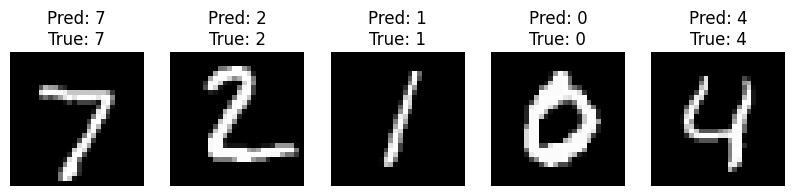

In [6]:
# 3. Créer le modèle
model = Sequential([
    Input(shape=(28, 28)), 
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Afficher le résumé du modèle (structure et paramètres)
model.summary()

# 4. Compiler le modèle
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 5. Entraîner le modèle
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=32,
    validation_data=(x_test, y_test)
)

# 6. Évaluer les performances
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")

# 7. Prédictions pour visualisation
predictions = model.predict(x_test)

# Visualiser quelques prédictions
num_images = 5
plt.figure(figsize=(10, 5))
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Pred: {np.argmax(predictions[i])}\nTrue: {y_test[i]}")
    plt.axis('off')
plt.show()

<h1>Exercice 2 : Classification d'images (Fashion-MNIST)
</h1>

<h3>1. Prétraitement des Données et Modèle ANN</h3>

In [7]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout

In [9]:
# Chargement du dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalisation et conversion en float
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Encodage one-hot des labels pour la perte 'categorical_crossentropy'
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Modèle ANN (réseau de neurones dense)
model_ann = Sequential([
    Input(shape=(28, 28)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2), # Couche Dropout pour régularisation
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model_ann.compile(
    optimizer='adam',
    loss='categorical_crossentropy', # Utilisation de categorical_crossentropy avec one-hot encoding
    metrics=['accuracy']
)

# Entraînement ANN (sur 10 époques comme suggéré plus loin dans le TP)
history_ann = model_ann.fit(
    X_train, y_train_cat,
    epochs=10,
    batch_size=128,
    validation_split=0.2 # Séparation d'un jeu de validation
)

# Évaluation ANN
test_loss_ann, test_acc_ann = model_ann.evaluate(X_test, y_test_cat)
print("Précision sur le test set (ANN):", test_acc_ann)

26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 20s 1us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 3s 1us/step
Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7715 - loss: 0.6445 - val_accuracy: 0.8486 - val_loss: 0.4351
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8444 - loss: 0.4340 - val_accuracy: 0.8586 - val_loss: 0.3976
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8591 - loss: 0.3879 - val_accuracy: 0.8666 - val_loss: 0.3632
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8659 - loss: 0.3636 - val_accuracy: 0.8718 - val_loss: 0.3589
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8731 - loss: 0.3448 - val_accuracy: 0.8740 - val_loss: 0.3442
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8791 - loss: 0.3311 - val_accuracy: 0.8758 - val_loss: 0.3409
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8835 - loss: 0.3171 - 

<h3>2. Modèle CNN (Convolutional Neural Network)</h3>

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 18s 37ms/step - accuracy: 0.7643 - loss: 0.6482 - val_accuracy: 0.8549 - val_loss: 0.4052
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 18s 47ms/step - accuracy: 0.8526 - loss: 0.4078 - val_accuracy: 0.8729 - val_loss: 0.3513
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - accuracy: 0.8721 - loss: 0.3529 - val_accuracy: 0.8783 - val_loss: 0.3279
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - accuracy: 0.8835 - loss: 0.3217 - val_accuracy: 0.8881 - val_loss: 0.3029
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - accuracy: 0.8911 - loss: 0.2974 - val_accuracy: 0.8908 - val_loss: 0.2943
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.8959 - loss: 0.2858 - val_accuracy: 0.8903 - val_loss: 0.2933
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9026 - loss: 0.2677 - val_accuracy: 0.8972 - val_loss: 0.2748
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.9061 - loss: 0.2536 - 

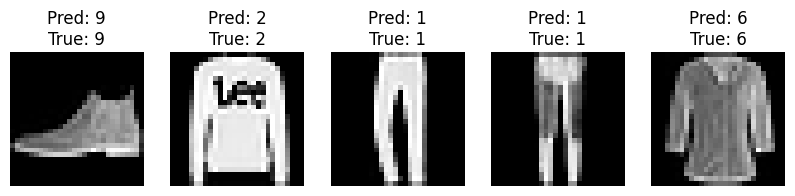

In [11]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# Reshape des données pour ajouter la dimension "canal" (requis pour Conv2D)
X_train_cnn = X_train.reshape(-1, 28, 28, 1)
X_test_cnn = X_test.reshape(-1, 28, 28, 1)

# Création du modèle CNN
cnn = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)), # Réduction de la dimension spatiale
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

# Compilation et résumé
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn.summary()

# Entraînement CNN (sur 10 époques)
history_cnn = cnn.fit(
    X_train_cnn, y_train_cat,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

# Évaluation CNN
test_loss_cnn, test_acc_cnn = cnn.evaluate(X_test_cnn, y_test_cat)
print("Précision CNN sur test set:", test_acc_cnn)

# Visualiser quelques prédictions
predictions = cnn.predict(X_test_cnn)
num_images = 5
plt.figure(figsize=(10, 5))
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"Pred: {np.argmax(predictions[i])}\nTrue: {y_test[i]}")
    plt.axis('off')
plt.show()